## Hypothesis Testing
Filzahanti Nuha Ramadhani

Dataset source: <a href="https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign">Marketing Campaign</a>

# Apakah education berpengaruh terhadap income?

In [23]:
import pandas as pd
import numpy as np
import scipy.stats as st
import researchpy as rp
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\FILZA 1\dibimbing\dataset\marketing customer analysis\marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Buat DataFrame baru dengan nama df1 yang isinya kolom Education dan Income dari df

In [4]:
df1 = df[['Education', 'Income']].copy()

In [5]:
#Lihat nilai unique di kolom Education
df1['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [6]:
len(df1)

2240

Hapus baris dengan nilai yang hilang

In [7]:
df1 = df1.dropna()
print('Jumlah baris setelah baris dengan nilai yang hilang dihapus:', len(df1))

Jumlah baris setelah baris dengan nilai yang hilang dihapus: 2216


Remove outliers

Text(0.5, 1.0, 'Sebelum outliers dihilangkan')

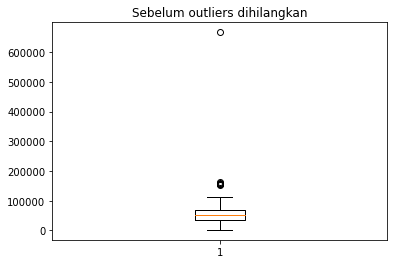

In [8]:
plt.boxplot(df1['Income'])
plt.title('Sebelum outliers dihilangkan')

In [9]:
q1 = df1['Income'].quantile(0.25)
q3 = df1['Income'].quantile(0.75)
IQR = q3 - q1
df1 = df1[~((df1['Income'] < (q1 - 1.5*IQR)) | (df1['Income'] > (q3 + 1.5*IQR)))]

Text(0.5, 1.0, 'Setelah outliers dihilangkan')

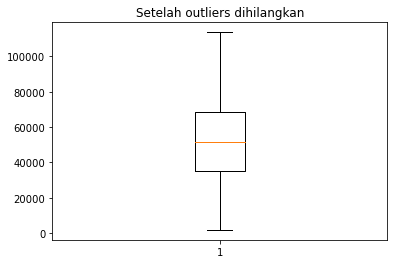

In [10]:
plt.boxplot(df1['Income'])
plt.title('Setelah outliers dihilangkan')

In [11]:
print('jumlah baris setelah outliers dihilangkan:', len(df1))

jumlah baris setelah outliers dihilangkan: 2208


## Case 1  
#### 'Graduation', 'PhD', 'Master', dan '2nd Cycle' diubah menjadi 'Postgraduate' dan 'Basic' diubah menjadi 'Undergraduate'

Buat DataFrame baru yang isinya sama dengan kolom di df1

In [30]:
df2 = df1.copy()

In [31]:
df2['Education']=df2['Education'].replace(['Graduation','PhD', 'Master','2n Cycle'],'Postgraduate')
df2['Education']=df2['Education'].replace(['Basic'],'Undergraduate')
df2['Education'].unique()

array(['Postgraduate', 'Undergraduate'], dtype=object)

Lihat distribusi Postgraduate dengan Undergraduate

AxesSubplot(0.125,0.125;0.775x0.755)


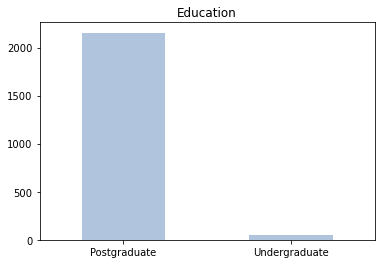

In [32]:
count=df2['Education'].value_counts()
print(count.plot(kind='bar', title='Education', rot=0, color='lightsteelblue'))

H0: Rata-rata income undergraduate sama dengan income postgraduate <br>
H1: Rata-rata income undergraduate tidak sama dengan income postgraduate

In [33]:
ratio = df2['Income'][df2['Education'] == 'Postgraduate'].var()/df2['Income'][df2['Education'] == 'Undergraduate'].var()
ratio

10.639349426386605

Pakai independent t-test (scipy.stats)

In [39]:
stat, pvalue = st.ttest_ind(df2['Income'][df2['Education'] == 'Postgraduate'],
            df2['Income'][df2['Education'] == 'Undergraduate'], equal_var=False)
print('stat:', f'{stat:.30f}', '\np value:', f'{pvalue:.51f}')

stat: 33.627307240532793741749628679827 
p value: 0.000000000000000000000000000000000000000000000000008


Pakai researchpy

In [35]:
summ, results = rp.ttest(group1=df2['Income'][df2['Education'] == 'Postgraduate'], group1_name='Postgraduate',
         group2=df2['Income'][df2['Education'] == 'Undergraduate'], group2_name='Undergraduate', equal_variances=False)

C:\Users\Filzahanti\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [36]:
summ

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Postgraduate,2154.0,52419.004178,20337.550537,438.203453,51559.658093,53278.350263
1,Undergraduate,54.0,20306.259259,6235.066773,848.485117,18604.413635,22008.104883
2,combined,2208.0,51633.638134,20713.376530,440.809926,50769.192479,52498.083789


In [37]:
results

,Satterthwaite t-test,results
0,Difference (Postgraduate - Undergraduate) =,32112.7449
1,Degrees of freedom =,84.8947
2,t =,33.6273
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.5965
7,Hedge's g =,1.5959
8,Glass's delta1 =,1.5790
9,Point-Biserial r =,0.9645


P-value kurang dari alpha (0.05), berarti H0 seharusnya ditolak. Maka, rata-rata income undergraduate tidak sama dengan income postgraduate. Rata-rata income postgraduate lebih besar dari income undergraduate.
Jawaban = berpengaruh

## Case 2 
#### 'Graduation', 'PhD', 'Master', dan '2n Cycle' dan 'Basic' tidak diubah

Buat DataFrame baru yang isinya sama dengan kolom di df1

In [19]:
df3 = df1.copy()

Lihat distribusi kelas di Education

AxesSubplot(0.125,0.125;0.775x0.755)


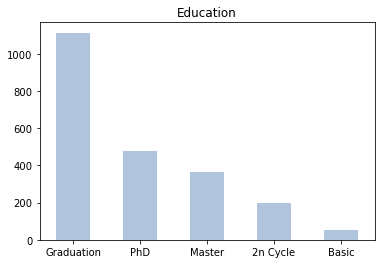

In [20]:
count=df3['Education'].value_counts()
print(count.plot(kind='bar', title='Education', rot=0, color='lightsteelblue'))

Pakai One-way ANOVA

H0: Rata-rata income semua kelas di Education sama <br>
H1: Paling tidak ada satu kelas yang memilki rata-rata yang berbeda

In [21]:
stat1, pvalue1 = st.f_oneway(df3['Income'][df3['Education'] == 'Graduation'],
        df3['Income'][df3['Education'] == 'PhD'],
        df3['Income'][df3['Education'] == 'Master'],
        df3['Income'][df3['Education'] == '2n Cycle'],
        df3['Income'][df3['Education'] == 'Basic'])
print('stat:', f'{stat1:.35f}', '\np value:', f'{pvalue1:.35f}')

stat: 39.27888353718497427280453848652541637 
p value: 0.00000000000000000000000000000008234


P-value kurang dari alpha (0.05), berarti H0 seharusnya ditolak. Maka, ada rata-rata income kelas di Education yang berbeda. Jawaban = berpengaruh